In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


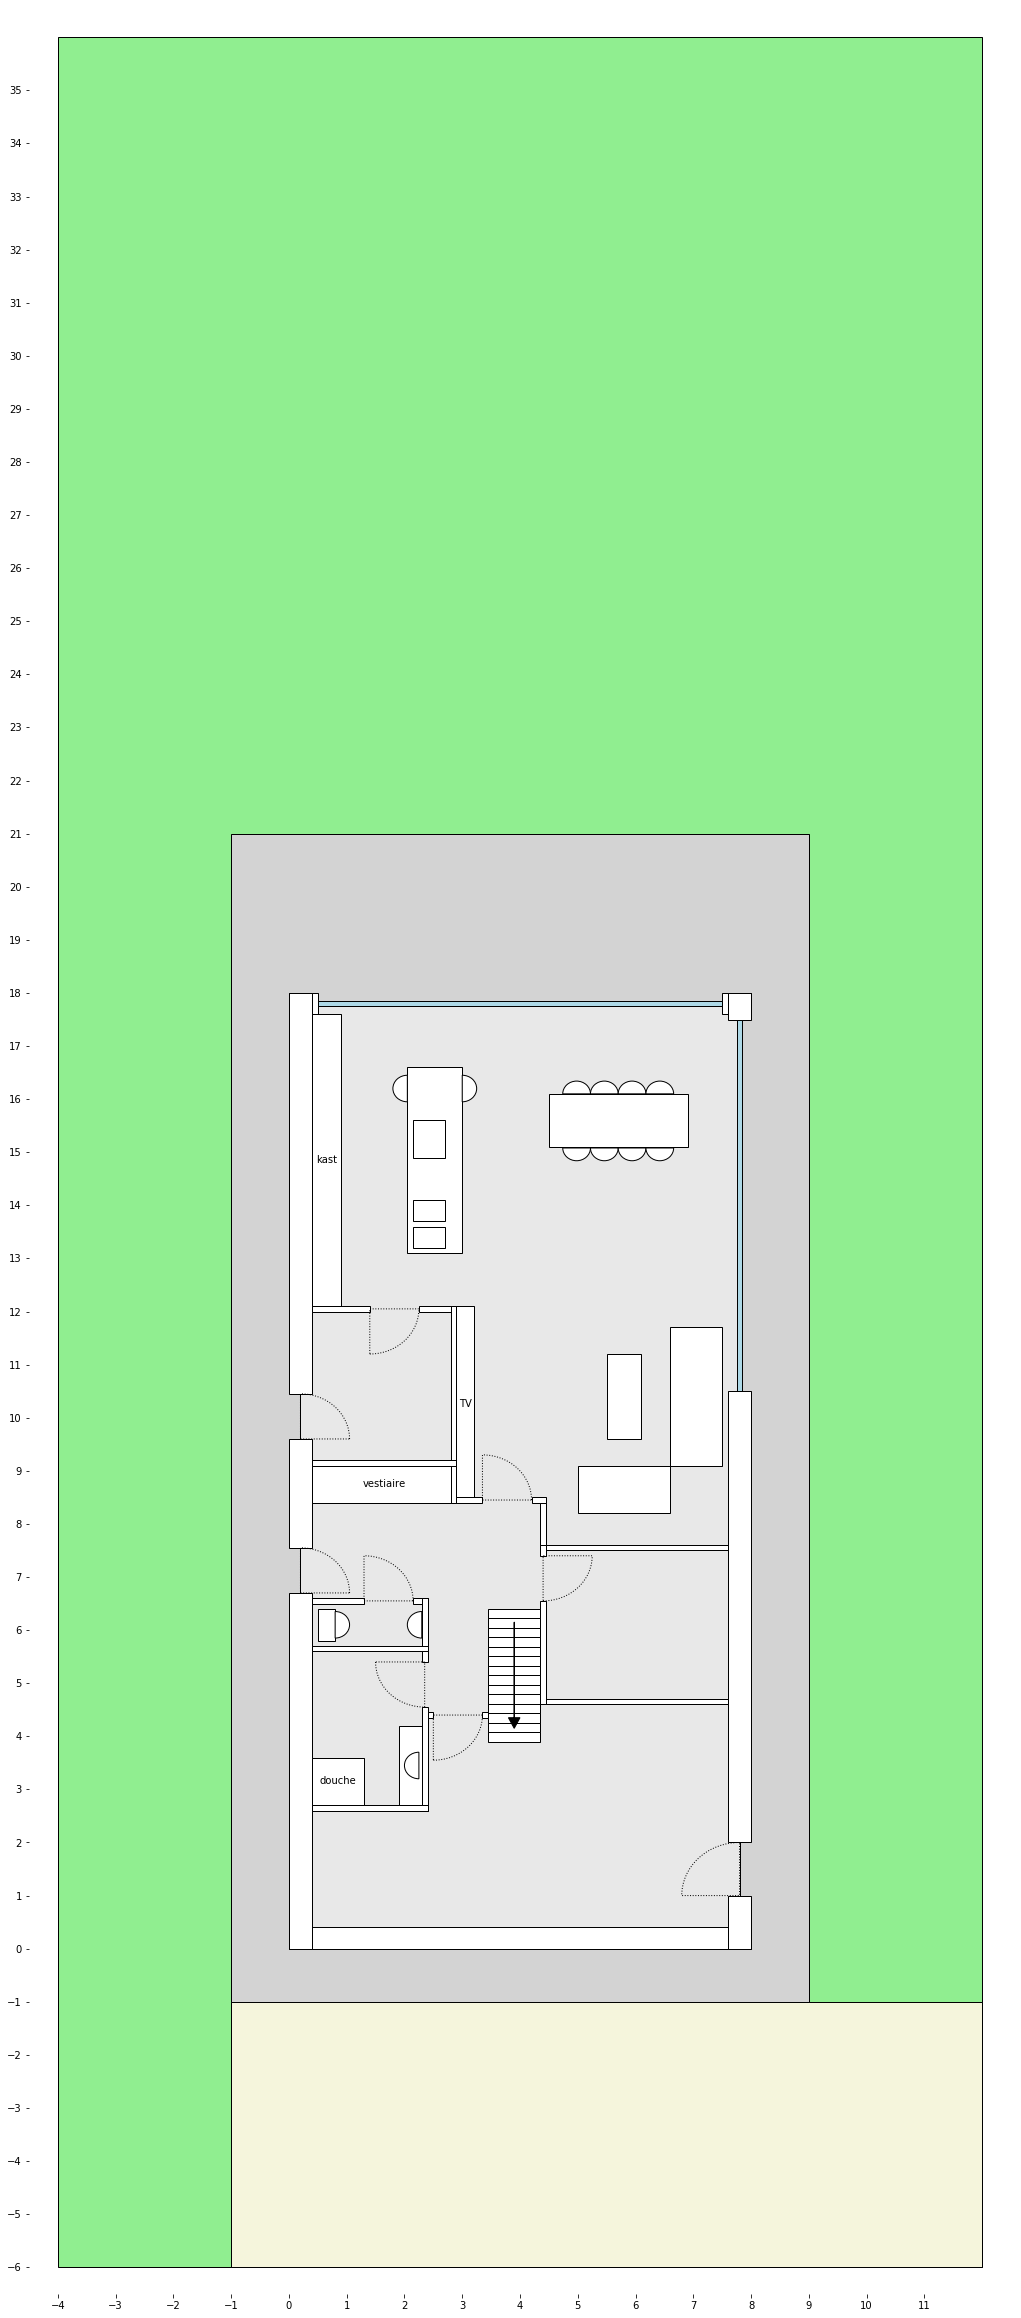

In [322]:
from floorplan2D import FloorPlan, InnerWall, OuterWall,Rect,Wall,HalfCircle,Arrow
import matplotlib.pyplot as plt
import numpy as np

fp = FloorPlan()

binnentop = 18-OuterWall.width
binnenbottom = OuterWall.width
binnenleft = OuterWall.width
binnenright = 8-OuterWall.width

fp.add(Rect(-4,-6,8+4,42-6,"lightgreen"))
fp.add(Rect(-1,-6,8+4,-1,"#f5f5dc"))
fp.add(Rect(-1,-1,8+1,18+3,"lightgrey"))
fp.add(Rect(OuterWall.width/2,
    OuterWall.width/2,
    8-OuterWall.width/2,
    18-OuterWall.width/2,
    "#e8e8e8"))


#OUTER WALLS
fp.add
o = OuterWall.horizontal(0,0,8,"bottom")
fp.add(o)

o = OuterWall.horizontal(18,0,8,"top")
o.window(0.5,7.5)
fp.add(o)

lo = OuterWall.vertical(0,0,18,"left")
fp.add(lo)

o = OuterWall.vertical(8,0,18,"right")
o.window(10.5,17.5)
o.door(1,"top","left",1)
fp.add(o)


# Keukenkast
keukenkasttop = binnentop
keukenkastbottom = binnentop - 5.5
keukenkastleft = binnenleft
keukenkastright = binnenleft + 0.5
r = Rect(keukenkastleft,
         keukenkastbottom,
         keukenkastright,
         keukenkasttop,
        "white",
        "kast")
fp.add(r)

# kookeiland

kookeilandtop = binnentop - 1
kookeilandbottom = binnentop - 4.5
kookeilandleft = keukenkastright + 1.15
kookeilandright = kookeilandleft + 0.95
r = Rect(kookeilandleft,
         kookeilandbottom,
         kookeilandright,
         kookeilandtop,"white")
         #"kook\neiland","white")
fp.add(r)

vuurtop = kookeilandtop - 1
vuurbottom = vuurtop- 0.70
vuurleft = kookeilandleft + 0.1
vuurright = kookeilandright - 0.3
fp.add(Rect(vuurleft,vuurbottom,vuurright,vuurtop))

afwasbak1bottom = kookeilandbottom + 0.1
afwasbak1top = afwasbak1bottom + 0.40
afwasbakleft = kookeilandleft+0.1
afwasbakright = kookeilandright -0.3
fp.add(Rect(afwasbakleft,afwasbak1bottom,afwasbakright,afwasbak1top))
afwasbak2bottom = afwasbak1top + 0.1
afwasbak2top = afwasbak2bottom + 0.40
fp.add(Rect(afwasbakleft,afwasbak2bottom,afwasbakright,afwasbak2top))

fp.add(HalfCircle(kookeilandleft,kookeilandtop-0.4,0.25,"left"))
fp.add(HalfCircle(kookeilandright,kookeilandtop-0.4,0.25,"right"))

# Tafel

tafeltop = binnentop - 1.5
tafelbottom = tafeltop - 1
tafelright = binnenright - 0.7
tafelleft = tafelright - 2.4
r = Rect(tafelleft,tafelbottom,tafelright,tafeltop,"white")
fp.add(r)

nb_stoelen = 4
for x in np.linspace(tafelleft,tafelright,nb_stoelen+2)[1:-1]:
    r = (tafelright-tafelleft)/(nb_stoelen+1)/2
    fp.add(HalfCircle(x,tafeltop,r,"top"))
    fp.add(HalfCircle(x,tafelbottom-0.02,r,"bottom"))

#koele berging
koelebergingtop = keukenkastbottom
koelebergingbottom = koelebergingtop - 3
koelebergingleft = binnenleft
koelebergingright = koelebergingleft + 2.5
w = InnerWall.horizontal(koelebergingtop,koelebergingleft,koelebergingright,"top")
w.door(keukenkastright+0.5,"right","bottom")
fp.add(w)
fp.add(InnerWall.vertical(koelebergingright,koelebergingtop,koelebergingbottom,"right"))
fp.add(InnerWall.horizontal(koelebergingbottom,koelebergingleft,koelebergingright,"bottom"))

lo.door(koelebergingbottom+0.5,"top","right")

# vestiaire
vestiairetop = koelebergingbottom
vestiairebottom = vestiairetop - 0.7
vestiaireleft = binnenleft
vestiaireright = koelebergingright
fp.add(Rect(vestiaireleft,vestiairebottom,vestiaireright,vestiairetop,text="vestiaire"))

# toilet
toilettop = vestiairebottom - 1.8
toiletbottom = toilettop -1
toiletleft = binnenleft
toiletright = toiletleft + 2
w = InnerWall.horizontal(toilettop,toiletleft,toiletright,"top")
w.door(toiletright-1.1,"right","top")
fp.add(w)
fp.add(InnerWall.vertical(toiletright,toiletbottom,toilettop,"right"))
fp.add(InnerWall.horizontal(toiletbottom,toiletleft,toiletright,"bottom"))

fp.add(Rect(toiletleft+0.1,toiletbottom+0.2,toiletleft+0.4,toilettop-0.2))
fp.add(HalfCircle(toiletleft+0.4,(toiletbottom+toilettop)/2,0.25,"right"))
fp.add(HalfCircle(toiletright-InnerWall.width,(toiletbottom+toilettop)/2,0.25,"left"))

# badkamer
badkamertop = toiletbottom
badkamerbottom = badkamertop - 3
badkamerleft = binnenleft
badkamerright = toiletright
w = InnerWall.vertical(badkamerright,badkamerbottom,badkamertop,"right")
w.door(badkamertop-0.2,"bottom","left")
fp.add(w)
fp.add(InnerWall.horizontal(badkamerbottom,badkamerleft,badkamerright,"bottom"))

#douche
fp.add(Rect(badkamerleft,
            badkamerbottom + InnerWall.width,
            badkamerleft+0.9,
            badkamerbottom + InnerWall.width+ 0.9,text="douche"))
#lavabo
fp.add(Rect(badkamerright-InnerWall.width-0.4,
            badkamerbottom+InnerWall.width,
            badkamerright-InnerWall.width,
            badkamerbottom+InnerWall.width+1.5
           ))
fp.add(HalfCircle(badkamerright-InnerWall.width-0.05,
                  badkamerbottom+InnerWall.width+0.75,
                 0.25,"left"))

# bureau
bureautop = binnentop - 10
bureaubottom = bureautop - 3
bureauright = binnenright
bureauleft = bureauright-3.25
w1 = InnerWall.horizontal(bureautop,bureauleft,bureauright,"top")
w2 = InnerWall.horizontal(bureaubottom,bureauleft,bureauright,"bottom")
w3 = InnerWall.vertical(bureauleft,bureaubottom,bureautop,"left")
w3.door(bureautop-0.2,"bottom","right")
fp.add(w1);fp.add(w2);fp.add(w3)

# zetel
zetelbottom = bureautop + 0.6
zetelkorttop = zetelbottom + 0.9
zetellangtop = zetelbottom + 3.50
zetelright = binnenright - 0.1
zetellangleft = zetelright - 0.9
zetelkortleft = zetelright - 2.5
fp.add(Rect(zetelkortleft,zetelbottom,zetellangleft,zetelkorttop,))
fp.add(Rect(zetellangleft,zetelkorttop,zetelright,zetellangtop))

fp.add(Rect(zetelkortleft+0.5,zetelkorttop+0.5,zetellangleft-0.5,zetellangtop-0.5))

# TV
tvtop = koelebergingtop
tvbottom = vestiairebottom
tvleft = koelebergingright
tvright = tvleft + 0.3
fp.add(Rect(tvleft,tvbottom,tvright,tvtop,text="TV"))

# Trap
traptop = bureautop - 1.2
trapbottom = traptop-2.5
trapright = bureauleft
trapleft = trapright - 0.90
n_treden = 15
ycos = np.linspace(traptop,trapbottom,n_treden)
for i,j in zip(ycos[:-1],ycos[1:]):
    fp.add(Rect(trapleft,i,trapright,j))
fp.add(Arrow((trapright+trapleft)/2, traptop - 0.25, 0,-2))

# hal
lo.door(toilettop+0.1,"top","right")
w1 = InnerWall.vertical(koelebergingright,koelebergingbottom,vestiairebottom,"right")
w2 = InnerWall.horizontal(vestiairebottom,koelebergingright,bureauleft+InnerWall.width,"bottom")
w2.door(bureauleft-1,"right","top")
w3 = InnerWall.vertical(bureauleft,bureautop,vestiairebottom,"left")
w4 = InnerWall.horizontal(badkamertop-1.2,badkamerright,trapleft)
w4.door(badkamerright+0.1,"right","bottom")
fp.add(w1);fp.add(w2);fp.add(w3);fp.add(w4)

fp.draw()

In [279]:
min(5,6)

5

In [112]:
class Foo:
    def __init__(self):
        self.a = 5

class Bar(Foo):
    def __init__(self):
        super().__init__()
        print(self.a)
        
Bar()

5
